# **Next Word Prediction using LSTM**





Submitted by : Poojith Mendem and Deva Priya Mankena

In [1]:
#importing necessary dependencies
import nltk
from nltk.corpus import gutenberg

In [2]:
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 615.3/615.3 MB 200.6 MB/s eta 0:00:01
ERROR: Operation cancelled by user


In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [4]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [5]:
#reading data
txt = gutenberg.raw('shakespeare-hamlet.txt')

with open('prototype.txt', 'w') as file:
  file.write(txt)

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [7]:
#tokenization
with open('prototype.txt','r') as file:
  sentence = file.read().lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts([sentence])
total_words = len(tokenizer.word_index)+1
tokenizer.word_index




{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [8]:
total_words

4818

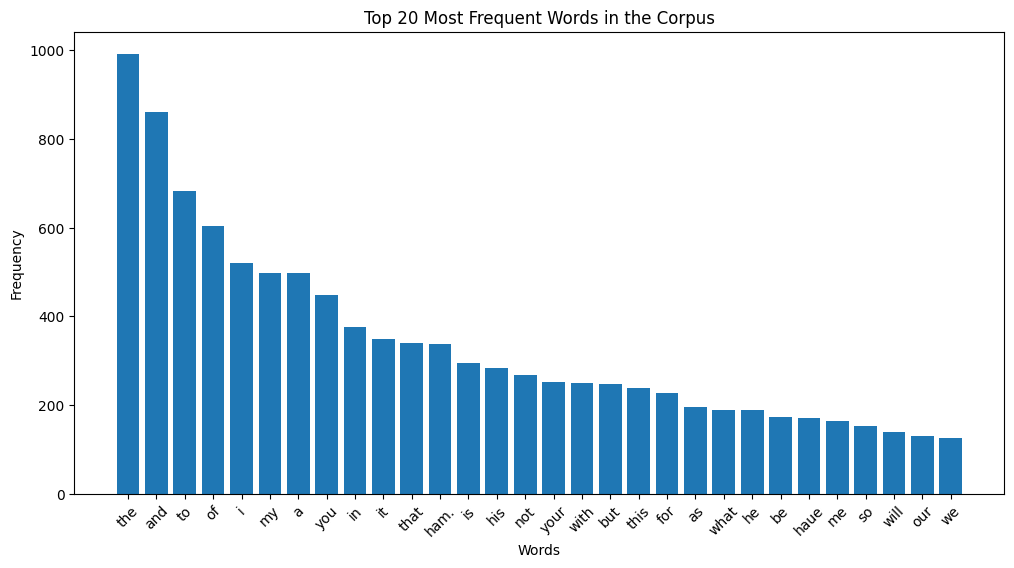

In [9]:
#plotting frequent words
import matplotlib.pyplot as plt
from collections import Counter

word_counts = Counter(sentence.split())
most_common_words = word_counts.most_common(30)

words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words in the Corpus")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [10]:
#sub-sequence vectors
input_sequences = []

for sent in sentence.split('\n'):
  t_list = tokenizer.texts_to_sequences([sent])[0]
  for i in range(1,len(t_list)):
    encode_word = t_list[:i+1]
    input_sequences.append(encode_word)

In [11]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [12]:
max_sequence_len = max([len(vector) for vector in input_sequences])
max_sequence_len


14

In [28]:
#padding
pad_seq_rep = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

In [14]:
pad_seq_rep

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]], dtype=int32)

In [15]:
#dependent and independent variables
x = pad_seq_rep[: , :-1]
y = pad_seq_rep[: , -1]


In [16]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]], dtype=int32)

In [17]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
x.shape

(25732, 13)

In [19]:
y.shape

(25732, 4818)

In [23]:
#ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# **Simple RNN Model**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense


simple_model = Sequential()
simple_model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))
simple_model.add(SimpleRNN(100, return_sequences=True))
simple_model.add(Dropout(0.2))
simple_model.add(SimpleRNN(100))
simple_model.add(Dense(100, activation='relu'))
simple_model.add(Dense(total_words, activation='softmax'))
simple_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [27]:
history = simple_model.fit(
    x,
    y,
    epochs=100,
    callbacks=[reduce_lr],
    verbose=1
)

Epoch 1/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0294 - loss: 7.0146 - learning_rate: 0.0010
Epoch 2/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0365 - loss: 6.5122 - learning_rate: 0.0010
Epoch 3/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0468 - loss: 6.3030 - learning_rate: 0.0010
Epoch 4/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0525 - loss: 6.1158 - learning_rate: 0.0010
Epoch 5/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0547 - loss: 5.9649 - learning_rate: 0.0010
Epoch 6/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0646 - loss: 5.8133 - learning_rate: 0.0010
Epoch 7/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0746 - loss: 5.7157 - learning_rate: 0.0010
Epoch 8/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0791 - loss: 5.5713 - learning_rate: 0.0010
Epoch 9/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0878 - loss: 5.4665 - learning_rate: 0.0010


# **LSTM Model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional
classifier = Sequential()
classifier.add(Embedding(total_words,100, input_length = max_sequence_len))
classifier.add(LSTM(100, return_sequences=True))
classifier.add(Dropout(0.2))
classifier.add(LSTM(100))
classifier.add(Dense(total_words, activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
hist = classifier.fit(x, y, epochs = 100, verbose = 1, callbacks=[ reduce_lr])

Epoch 1/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.0326 - loss: 7.0688 - learning_rate: 0.0010
Epoch 2/100
 25/805 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0291 - loss: 6.5057

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0394 - loss: 6.4726 - learning_rate: 0.0010
Epoch 3/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0515 - loss: 6.2812 - learning_rate: 0.0010
Epoch 4/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0523 - loss: 6.1539 - learning_rate: 0.0010
Epoch 5/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0576 - loss: 6.0093 - learning_rate: 0.0010
Epoch 6/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0659 - loss: 5.8605 - learning_rate: 0.0010
Epoch 7/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0750 - loss: 5.6919 - learning_rate: 0.0010
Epoch 8/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0817 - loss: 5.5614 - learning_rate: 0.0010
Epoch 9/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0879 - loss: 5.4510 - learning_rate: 0.0010
Epoch 10/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0943 - loss: 5.3129 - learning_rate: 0.0010
Epoch 1

# **Bi-directional LSTM**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, LayerNormalization
from tensorflow.keras.activations import swish

advance = Sequential()
advance.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))
advance.add(Bidirectional(LSTM(150, activation='relu', return_sequences=True)))
advance.add(LayerNormalization())
advance.add(Bidirectional(LSTM(150, activation='relu', return_sequences=True)))
advance.add(Bidirectional(LSTM(150, activation=swish)))
advance.add(Dense(total_words, activation='softmax'))

advance.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [30]:
advance.fit(x, y, epochs=100, verbose=1, callbacks = reduce_lr)

Epoch 1/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.0311 - loss: 7.0044 - learning_rate: 0.0010
Epoch 2/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.0536 - loss: 6.2803 - learning_rate: 0.0010
Epoch 3/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.0756 - loss: 5.8748 - learning_rate: 0.0010
Epoch 4/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.0956 - loss: 5.3838 - learning_rate: 0.0010
Epoch 5/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1163 - loss: 4.9057 - learning_rate: 0.0010
Epoch 6/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.1494 - loss: 4.3561 - learning_rate: 0.0010
Epoch 7/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.2118 - loss: 3.7122 - learning_rate: 0.0010
Epoch 8/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3044 - loss: 3.0910 - learning_rate: 0.0010
Epoch 9/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4065 - loss: 2.5108 - learn

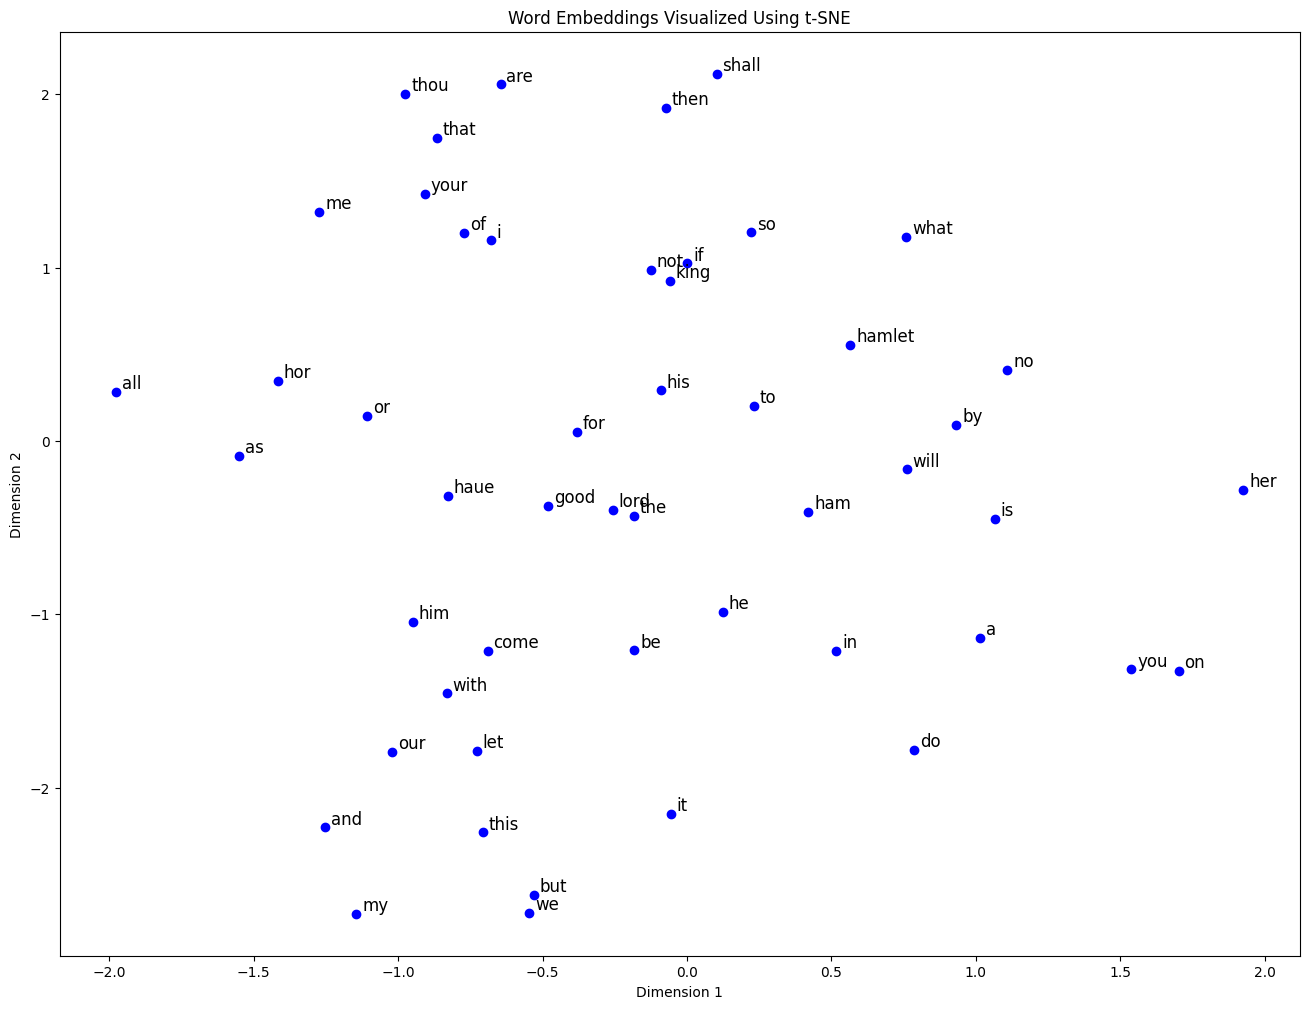

In [ ]:
#plotting word embeddings for 50 words
from sklearn.manifold import TSNE
import numpy as np

embedd = advance.layers[0]
wts = embedd.get_weights()[0]

no_of_words = 50
s_embedd = wts[:no_of_words]
s_words = list(tokenizer.word_index.keys())[:no_of_words]

tsne = TSNE(n_components=2, random_state=45)
reduce_range = tsne.fit_transform(s_embedd)

plt.figure(figsize=(16, 12))
for i, word in enumerate(s_words):
    plt.scatter(reduce_range[i, 0], reduce_range[i, 1], color='blue')
    plt.text(reduce_range[i, 0] + 0.02, reduce_range[i, 1] + 0.02, word, fontsize=12)
plt.title("Word Embeddings Visualized Using t-SNE")
plt.xlabel("Dimension 2")
plt.ylabel("Dimension 2")
plt.show()


In [31]:
#preprocessing user input
def predict_next_word(classifier, token, text, max_len):
  token_list = tokenizer.texts_to_sequences([text])[0]
  if(len(token_list)) >= max_len:
    token_list = token_list[-(max_sequence_len - 1) : ]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre' )
  predicted = advance.predict(token_list, verbose = 0)
  predicted_word_index = np.argmax(predicted, axis =1)
  for word, index in tokenizer.word_index.items():
    if index == predicted_word_index:
      return word
  return None

In [32]:
#prediction
input_text = "And why such dayly Cast of Brazon"
print(f"Input text: {input_text}")
max_sequence_len = advance.input_shape[1]+1
next_word = predict_next_word(advance, tokenizer, input_text, max_sequence_len)
print(f"Next word prediction : {next_word}")

Input text: And why such dayly Cast of Brazon
Next word prediction : cannon


In [33]:
#prediction
input_text = "to watch the minutes of this"
print(f"Input text: {input_text}")
max_sequence_len = advance.input_shape[1]+1
next_word = predict_next_word(advance, tokenizer, input_text, max_sequence_len)
print(f"Next word prediction : {next_word}")

Input text: to watch the minutes of this
Next word prediction : night


In [34]:
#prediction
input_text = "When yond same Starre that's Westward from the"
print(f"Input text: {input_text}")
max_sequence_len = advance.input_shape[1]+1
next_word = predict_next_word(advance, tokenizer, input_text, max_sequence_len)
print(f"Next word prediction : {next_word}")

Input text: When yond same Starre that's Westward from the
Next word prediction : pole


In [36]:
#prediction
input_text = "Such was the very"
print(f"Input text: {input_text}")
max_sequence_len = advance.input_shape[1]+1
next_word = predict_next_word(advance, tokenizer, input_text, max_sequence_len)
print(f"Next word prediction : {next_word}")

Input text: Such was the very
Next word prediction : armour


In [37]:
#prediction
input_text = "At least the whisper goes so: Our last"
print(f"Input text: {input_text}")
max_sequence_len = advance.input_shape[1]+1
next_word = predict_next_word(advance, tokenizer, input_text, max_sequence_len)
print(f"Next word prediction : {next_word}")

Input text: At least the whisper goes so: Our last
Next word prediction : king
